# Reproducibility and risk audit

## Preperation

In [1]:
# Install all required packages

import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt
import seaborn as sns
import re, sys, os

import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE

import nltk
from nltk.corpus import stopwords

import textblob 
from textblob import Word
from textblob import TextBlob

from scipy import stats
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

from wordcloud import WordCloud 

from collections import Counter

In [2]:
# Get the dataset

df = pd.read_excel('Data.xlsx', sheet_name='Consoilidated')

In [3]:
# This block checks to ensure that all the columns in the uploaded datasheet are as expected.
# Proceed with the analysis if there is no error.
# If there is an error, follow the instructions in the error message.

expected_cols = ['Person', 'Day', 'Date ', 'Sleep (hours)', 'Sleep (minutes)'
                 , 'Minutes of sleep', 'Sleep Quality (1 Very Bad - 5 Very Good)'
                 , 'How many times did you wake up during the night'
                 , 'Wakeup Time (HH:MM)', 'Bedtime (HH:MM)(night before)'
                 , 'Did you nap during the day (yes/ no)', 'Steps', 'KM'
                 , 'Any physical activity not recorded by health app (yes/no) (such as swiming)'
                 , 'Description of mood/experience during day. No word limit. Free text .'
                 , 'Personal Expenses']

provided_cols = list(df)

if provided_cols != expected_cols:
    raise ValueError('Expected data file column headers do not match with the provided data file column headers.\n'
    'Check if the all the columns are present in the uploaded dataset and in order :\n'
    f'{expected_cols}')

In [4]:
# Convert the 'Day' to be ordered 

cats_day = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
df['Day'] = df['Day'].astype(CategoricalDtype(categories=cats_day, ordered=True))

In [6]:
# Conver type of 'Date' column

df['Date '] = pd.to_datetime(df['Date ']).apply(lambda x: x.date())

## Analysis of dataset
### Sleep analysis

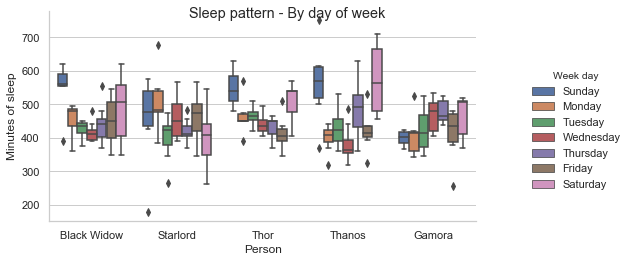

In [8]:
# Visualize the sleep pattern of the participants by day of the week using the seaborn's box plot.

sns.set(style='whitegrid')
ax = sns.catplot(x='Person', y='Minutes of sleep'
                , kind='box', hue='Day', legend=False
                , data=df)
ax.add_legend(title='Week day')
ax.fig.suptitle('Sleep pattern - By day of week')
ax.fig.set_size_inches(9.5, 3.5)

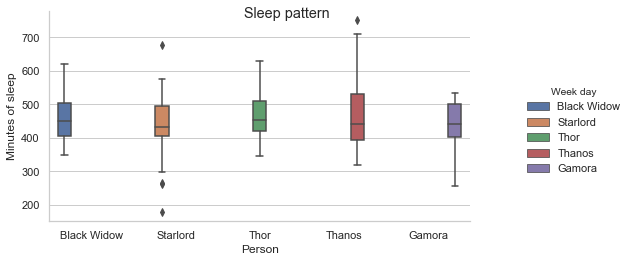

In [9]:
# Visualize the sleep pattern of the participants using the seaborn's box plot.

sns.set(style='whitegrid')
ax = sns.catplot(x='Person', y='Minutes of sleep'
                , kind='box', hue='Person', legend=False
                , data=df)
ax.add_legend(title='Week day')
ax.fig.suptitle('Sleep pattern')
ax.fig.set_size_inches(9.5, 3.5)